In [ ]:
##IMPORT THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Read the dataset

In [2]:
df=pd.read_csv('HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### DATA PREPROCESSING



In [4]:
df.isnull().sum()


age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [7]:
df.shape

(303, 14)

In [9]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

### CHECK DATATYPE

In [10]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [13]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

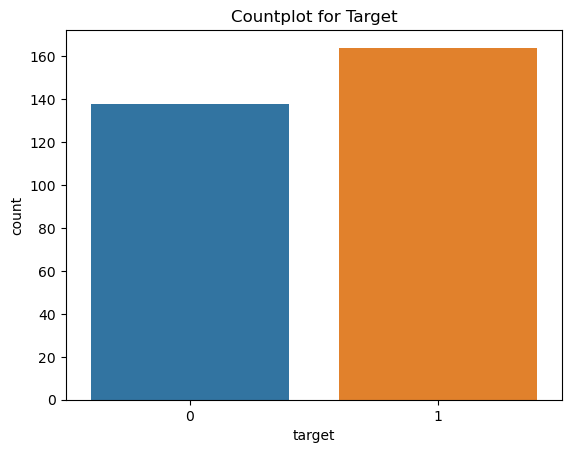

In [15]:
sns.countplot(x=df['target'])
plt.title('Countplot for Target')
plt.show()

### EDA 

In [16]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
cont_cols = ['age','rest_bps','cholestrol','thalach','old_peak']


In [19]:
df['rest_ecg'].value_counts()

1    151
0    147
2      4
Name: rest_ecg, dtype: int64

In [20]:
df.groupby(['target'])[['age','rest_bps','cholestrol','thalach','old_peak']].agg(['mean' , 'min' ,'max'])

age            rest_bps            cholestrol            \
             mean min max        mean  min  max        mean  min  max   
target                                                                  
0       56.601449  35  77  134.398551  100  200  251.086957  131  409   
1       52.585366  29  76  129.250000   94  180  242.640244  126  564   

           thalach           old_peak            
              mean min  max      mean  min  max  
target                                           
0       139.101449  71  195  1.585507  0.0  6.2  
1       158.378049  96  202  0.586585  0.0  4.2

In [21]:
df.groupby(['target'])[cont_cols].agg(['mean' , 'min' ,'max'])

age            rest_bps            cholestrol            \
             mean min max        mean  min  max        mean  min  max   
target                                                                  
0       56.601449  35  77  134.398551  100  200  251.086957  131  409   
1       52.585366  29  76  129.250000   94  180  242.640244  126  564   

           thalach           old_peak            
              mean min  max      mean  min  max  
target                                           
0       139.101449  71  195  1.585507  0.0  6.2  
1       158.378049  96  202  0.586585  0.0  4.2

In [32]:
sns.set_style('darkgrid')

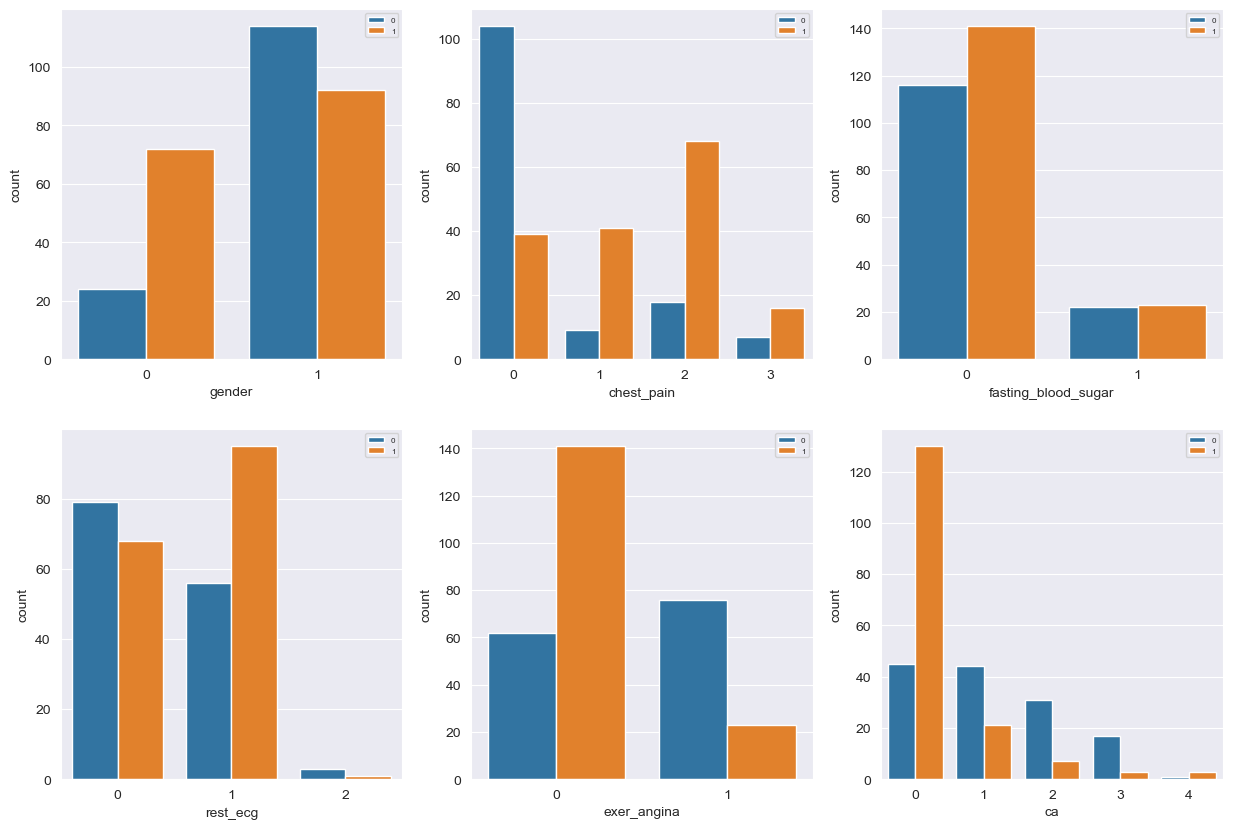

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x=df['gender'],hue=df['target'])
plt.legend(fontsize = 'xx-small')


plt.subplot(2,3,2)
sns.countplot(x=df['chest_pain'],hue=df['target'])
plt.legend(fontsize = 'xx-small')

plt.subplot(2,3,3)
sns.countplot(x=df['fasting_blood_sugar'],hue=df['target'])
plt.legend(fontsize = 'xx-small')

plt.subplot(2,3,4)
sns.countplot(x=df['rest_ecg'],hue=df['target'])
plt.legend(fontsize = 'xx-small')

plt.subplot(2,3,5)
sns.countplot(x=df['exer_angina'],hue=df['target'])
plt.legend(fontsize = 'xx-small')

plt.subplot(2,3,6)
sns.countplot(x=df['ca'],hue=df['target'])
plt.legend(fontsize = 'xx-small')

plt.show()

#### INFERENCES

#h# 1)Patients with ca 0 are more prone to heart disease.
#2) Patients with chest pain= 0 are less prone to heart disease.
#3) Patients with rest_ecg= 1 are more prone to heart disease.
#4) Patients with exer_angina= 0 are more prone to heart disease.

In [35]:
print(cont_cols)

['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']


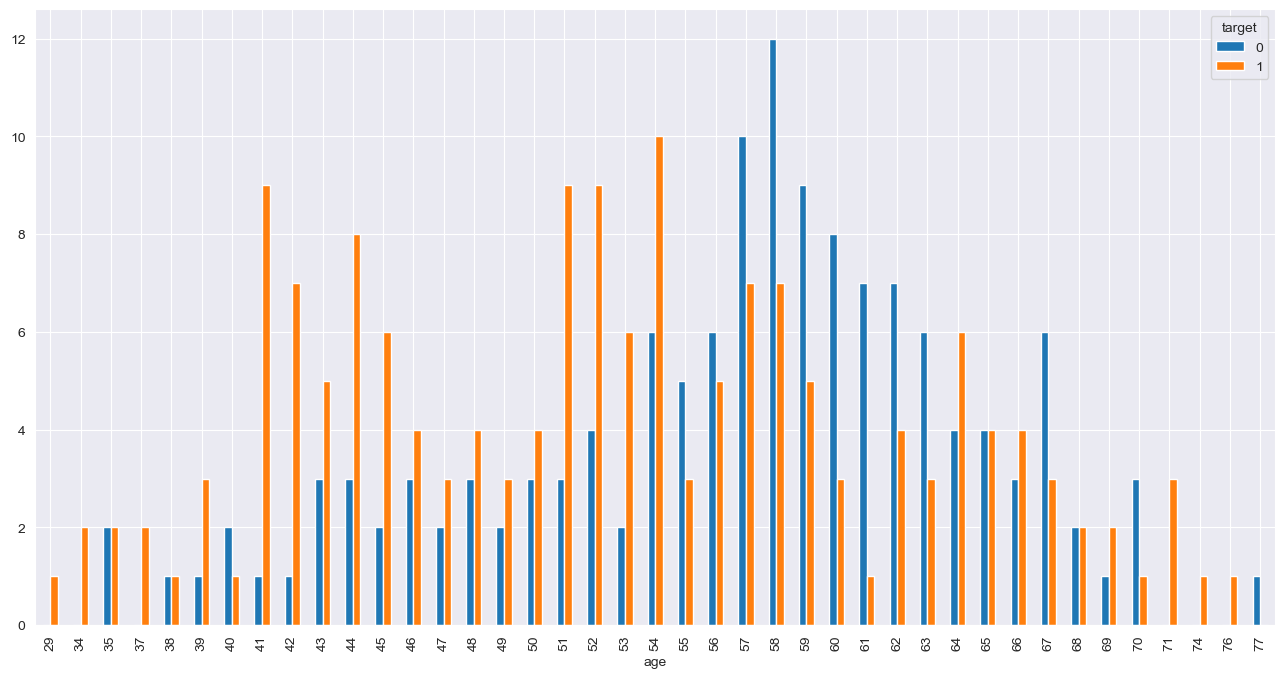

In [40]:

pd.crosstab(df['age'],df['target']).plot(kind='bar',figsize=(16,8))
plt.show()

In [43]:
df['age_grp'] = pd.cut(df['age'] , bins=list(range(25,85,5)))
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target,age_grp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 65]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(35, 40]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 45]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(55, 60]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(55, 60]"


In [45]:
pt1 = pd.pivot_table(data=df , index=df['age_grp'],columns = ['target'] , values=['cholestrol'])
pt1

#chol mean according to age group and targetwise 

cholestrol            
target             0           1
age_grp                         
(25, 30]         NaN  204.000000
(30, 35]  240.000000  191.750000
(35, 40]  210.000000  225.571429
(40, 45]  248.100000  233.371429
(45, 50]  237.000000  236.166667
(50, 55]  257.350000  245.675676
(55, 60]  253.000000  237.703704
(60, 65]  258.678571  268.333333
(65, 70]  245.933333  275.333333
(70, 75]         NaN  246.250000
(75, 80]  304.000000  197.000000

cholestrol            
target             0           1
age_grp                         
(25, 30]         NaN  204.000000
(30, 35]  240.000000  191.750000
(35, 40]  210.000000  225.571429
(40, 45]  248.100000  233.371429
(45, 50]  237.000000  236.166667
(50, 55]  257.350000  245.675676
(55, 60]  253.000000  237.703704
(60, 65]  258.678571  268.333333
(65, 70]  245.933333  275.333333
(70, 75]         NaN  246.250000
(75, 80]  304.000000  197.000000

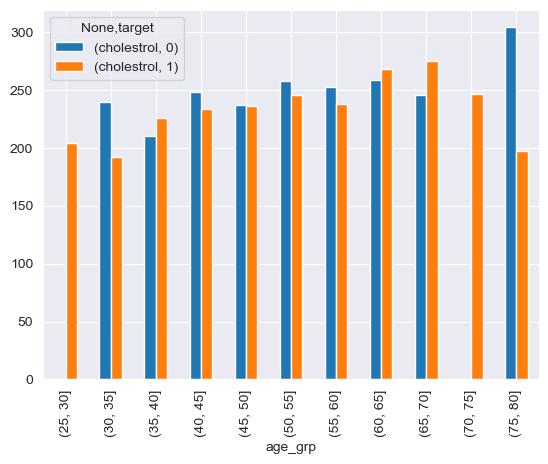

In [50]:
pt1.plot(kind='bar')
pt1

In [46]:
df[df['age'].between(70,75)]

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target,age_grp
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,"(70, 75]"
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,"(70, 75]"
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,"(70, 75]"
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,"(65, 70]"
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,"(70, 75]"
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"(65, 70]"
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,"(65, 70]"
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,"(65, 70]"


In [48]:
pt2 = pd.pivot_table(data=df , index=df['age_grp'],columns = ['target'] , values=['cholestrol'],aggfunc=['min','max','mean'])
pt2

#default agg functions is mean


min               max               mean            
         cholestrol        cholestrol         cholestrol            
target            0      1          0      1           0           1
age_grp                                                             
(25, 30]        NaN  204.0        NaN  204.0         NaN  204.000000
(30, 35]      198.0  182.0      282.0  210.0  240.000000  191.750000
(35, 40]      167.0  175.0      231.0  321.0  210.000000  225.571429
(40, 45]      169.0  141.0      341.0  315.0  248.100000  233.371429
(45, 50]      149.0  177.0      311.0  275.0  237.000000  236.166667
(50, 55]      188.0  175.0      353.0  342.0  257.350000  245.675676
(55, 60]      131.0  126.0      409.0  354.0  253.000000  237.703704
(60, 65]      164.0  177.0      407.0  417.0  258.678571  268.333333
(65, 70]      174.0  211.0      322.0  564.0  245.933333  275.333333
(70, 75]        NaN  149.0        NaN  302.0         NaN  246.250000
(75, 80]      304.0  197.0      304.0  197.0  304.000000  197.000000

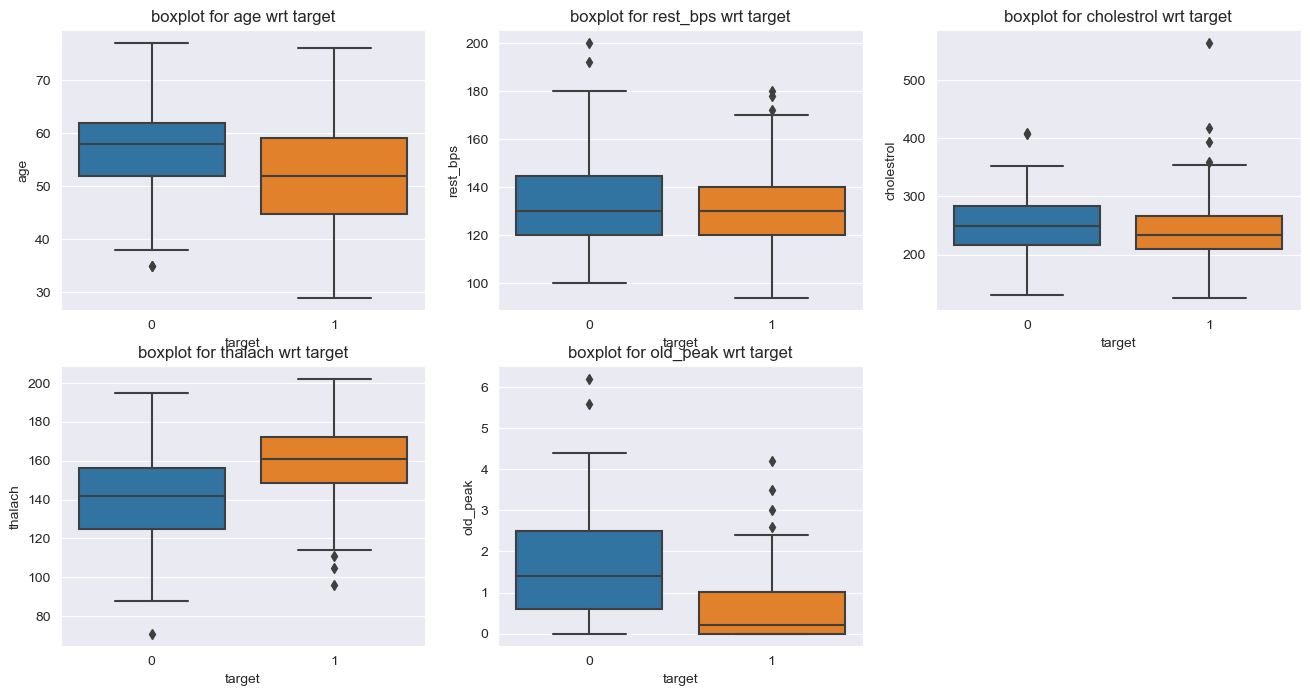

In [55]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
sns.boxplot(x=df['target'],y=df['age'])
plt.title('boxplot for age wrt target')

plt.subplot(2,3,2)
sns.boxplot(x=df['target'],y=df['rest_bps'])
plt.title('boxplot for rest_bps wrt target')

plt.subplot(2,3,3)
sns.boxplot(x=df['target'],y=df['cholestrol'])
plt.title('boxplot for cholestrol wrt target')

plt.subplot(2,3,4)
sns.boxplot(x=df['target'],y=df['thalach'])
plt.title('boxplot for thalach wrt target')

plt.subplot(2,3,5)
sns.boxplot(x=df['target'],y=df['old_peak'])
plt.title('boxplot for old_peak wrt target')

plt.show()

In [ ]:
####correlation

C:\Users\neela\AppData\Local\Temp\ipykernel_13260\2544356000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


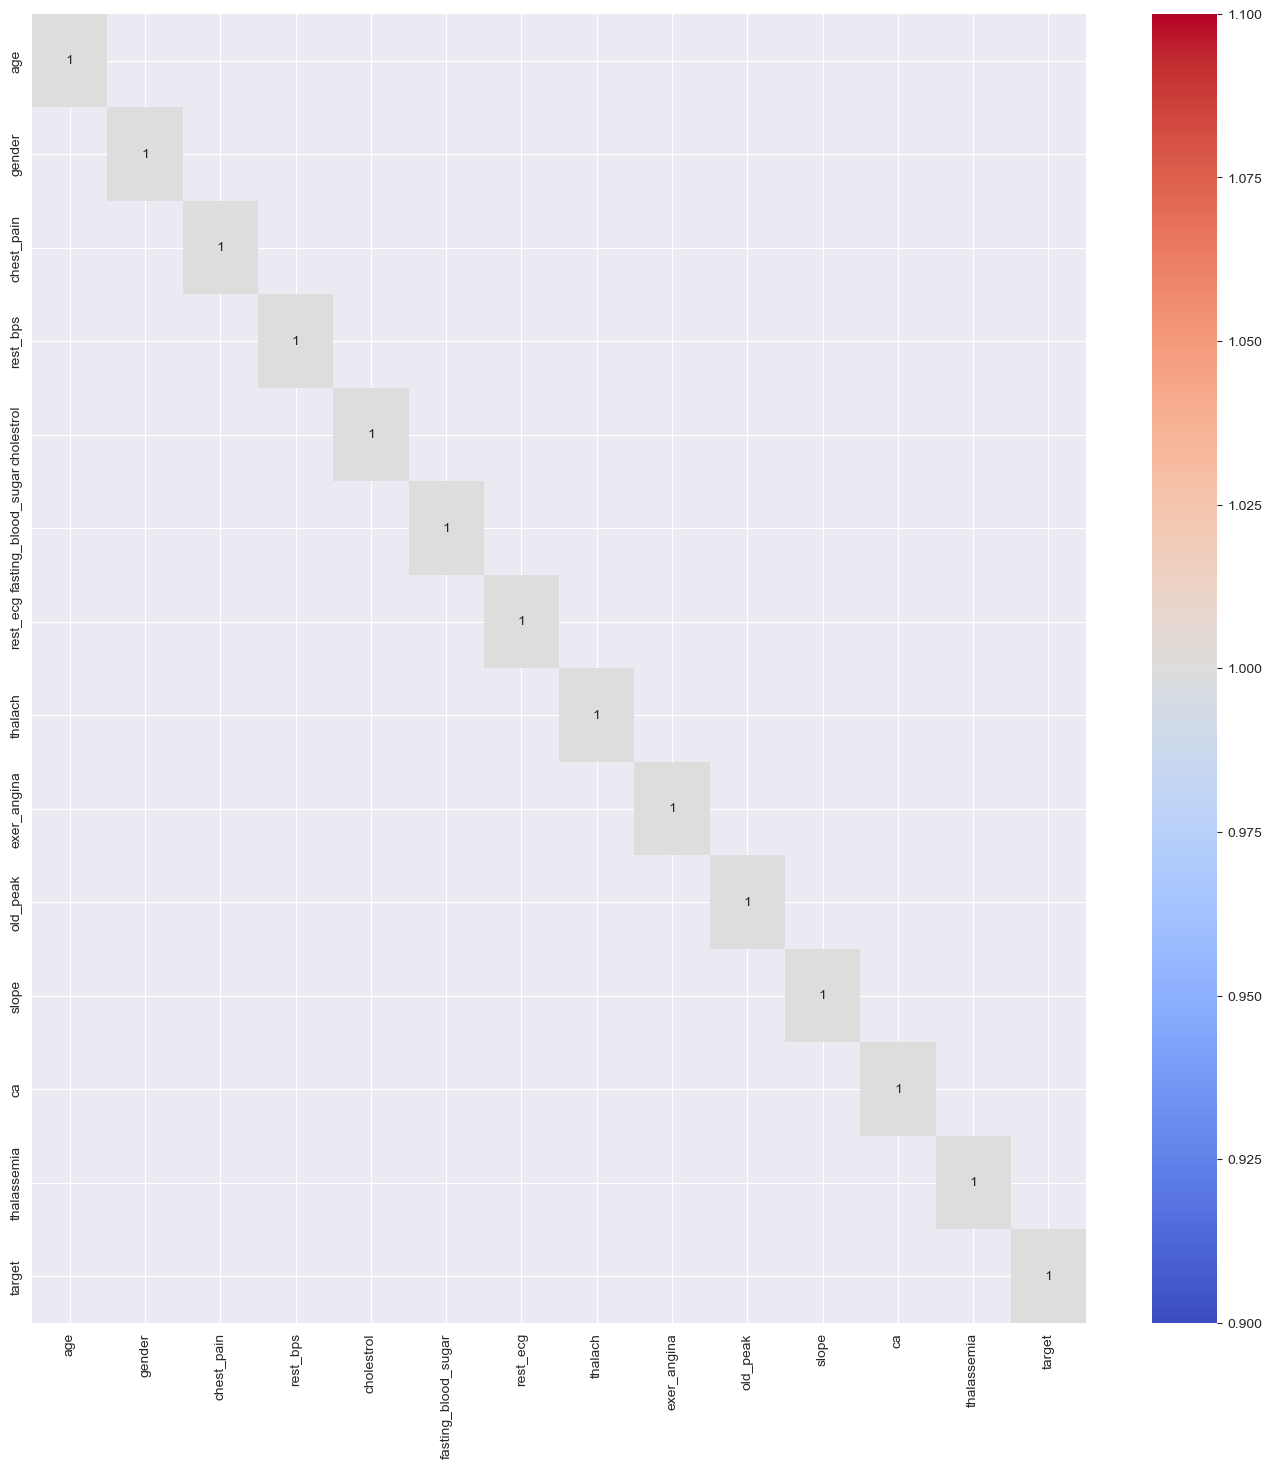

In [59]:
corr = df.corr()
plt.figure(figsize=(17,17))
sns.heatmap(corr[abs(corr)>= 0.7] , annot=True , cmap='coolwarm')
plt.show()

In [ ]:
###INFERENCE 

#1) highly correlated features are not present 

## OUTLIER TREAMENT

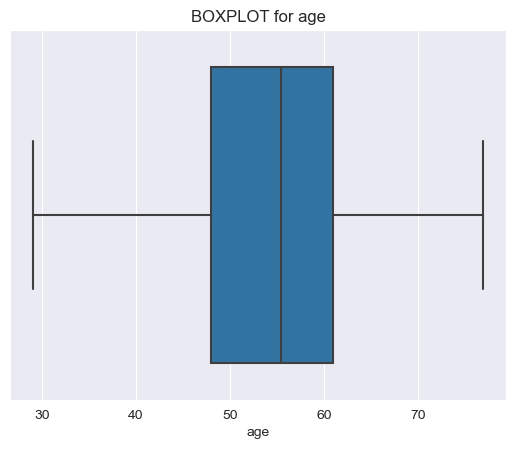

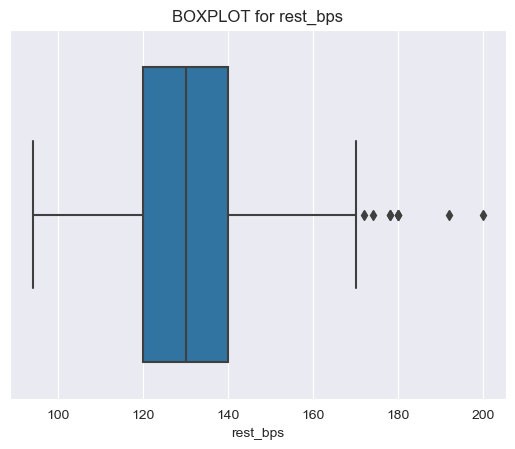

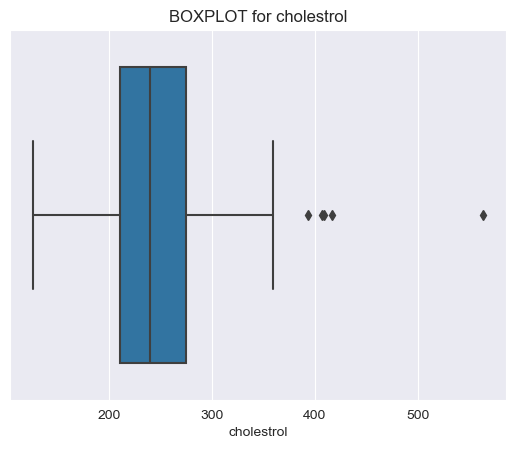

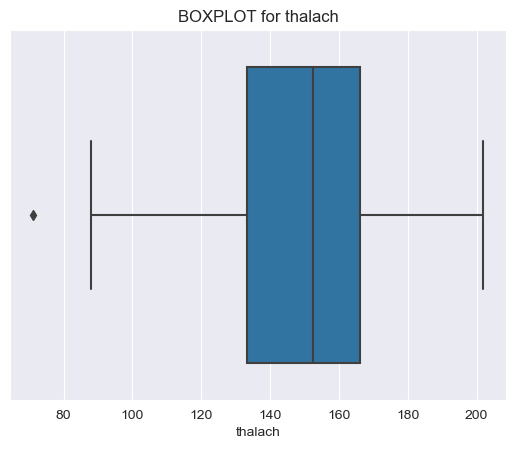

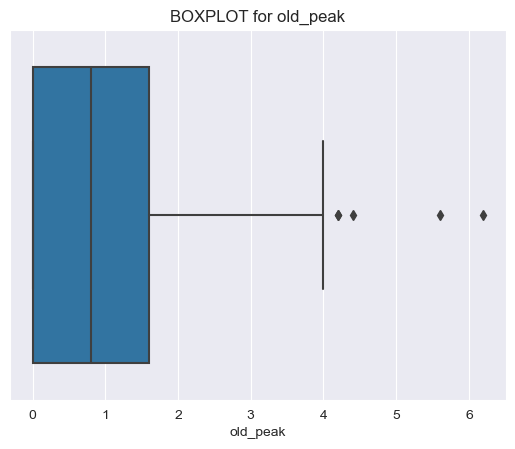

In [63]:
for i in cont_cols:
    sns.boxplot(x=df[i])
    plt.title(f'BOXPLOT for {i}')
    plt.show()

In [64]:
df[cont_cols].describe(percentiles = [0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T


,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,302.0,54.420530,9.047970,29.0,35.00,35.04,38.00,40.00,55.5,68.00,69.97,70.00,71.00,77.0
rest_bps,302.0,131.602649,17.563394,94.0,100.00,101.02,104.03,108.00,130.0,160.00,170.00,177.92,180.00,200.0
cholestrol,302.0,246.500000,51.753489,126.0,149.00,160.08,167.03,175.05,240.5,326.95,340.97,353.98,406.87,564.0
thalach,302.0,149.569536,22.903527,71.0,95.01,97.04,103.06,108.05,152.5,181.95,184.97,186.98,191.98,202.0
old_peak,302.0,1.043046,1.161452,0.0,0.00,0.00,0.00,0.00,0.8,3.40,3.60,4.00,4.20,6.2


In [69]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [70]:
df1 = df.copy()

In [71]:
df[cont_cols] = df[cont_cols].apply(outlier_treatment)

### SELECT X AND Y 

In [76]:
x = df.drop(['target','age_grp'],axis=1)
y = df['target']
print(type(x),type(y))
print(x.shape)
print(y.shape)            

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(302, 13)
(302,)


In [75]:
x.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split 

In [79]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


In [80]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.metrics import recall_score, accuracy_score,plot_confusion_matrix

In [93]:
sns.set_style('white')

In [151]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(classification_report(ytest,ypred))
    #plot_confusion_matrix(model,x_test,ytest)
    sns.heatmap(cm , annot=True)
    plt.show()
    
#tabulate_model_performance
def tmp(x_train,x_test, y_train , y_test,ypred,model,modelname=None):
    eval_model(y_test,ypred)
    train_acc_sc = model.score(x_train,y_train)
    test_acc_sc = model.score(x_test,y_test)
    pre_sc = precision_score(y_test, ypred)
    rec_sc = recall_score(y_test , ypred)
    res = pd.DataFrame({'Train_Acc':train_acc_sc ,'Test_Acc':test_acc_sc , 
                        'Precision' : pre_sc , 'Recall' : rec_sc} , index=[modelname])
    return res
    

In [152]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [153]:
dt1 = DecisionTreeClassifier(criterion = 'gini',random_state=25)
dt1.fit(x_train , y_train)

DecisionTreeClassifier(random_state=25)

In [154]:
print('Train acc', dt1.score(x_train,y_train))
print('test acc' , dt1.score(x_test , y_test))

Train acc 1.0
test acc 0.8131868131868132


In [155]:
# dt2 = DecisionTreeClassifier(criterion = 'gini', random_state=25)
# dt2.fit(x_train , y_train)

In [156]:
# print('Train acc', dt2.score(x_train,y_train))
# print('test acc' , dt2.score(x_test , y_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        36
           1       0.87      0.82      0.84        55

    accuracy                           0.81        91
   macro avg       0.80      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



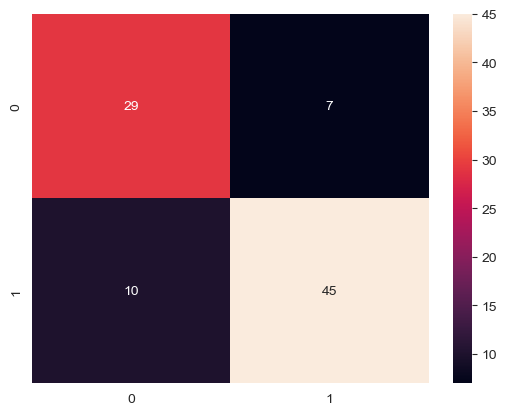

In [157]:
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test , ypred_dt1)

In [158]:
import sklearn
print(sklearn. __version__)

1.2.1


              precision    recall  f1-score   support

           0       0.74      0.81      0.77        36
           1       0.87      0.82      0.84        55

    accuracy                           0.81        91
   macro avg       0.80      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



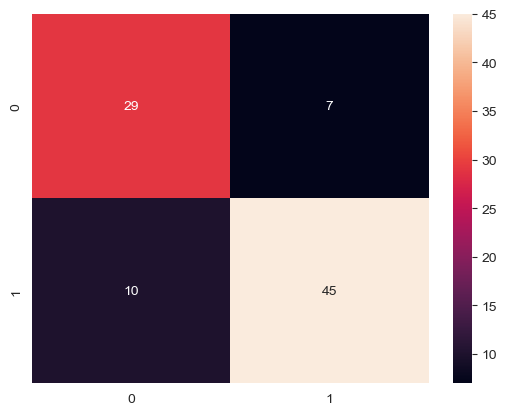

,Train_Acc,Test_Acc,Precision,Recall
DT1(gini),1.0,0.813187,0.865385,0.818182


In [159]:
dt1_df = tmp(x_train , x_test , y_train,y_test,ypred_dt1 , dt1 , 'DT1(gini)')
dt1_df

# 

In [160]:
fn = x_train.columns
cn = ['0' , '1']


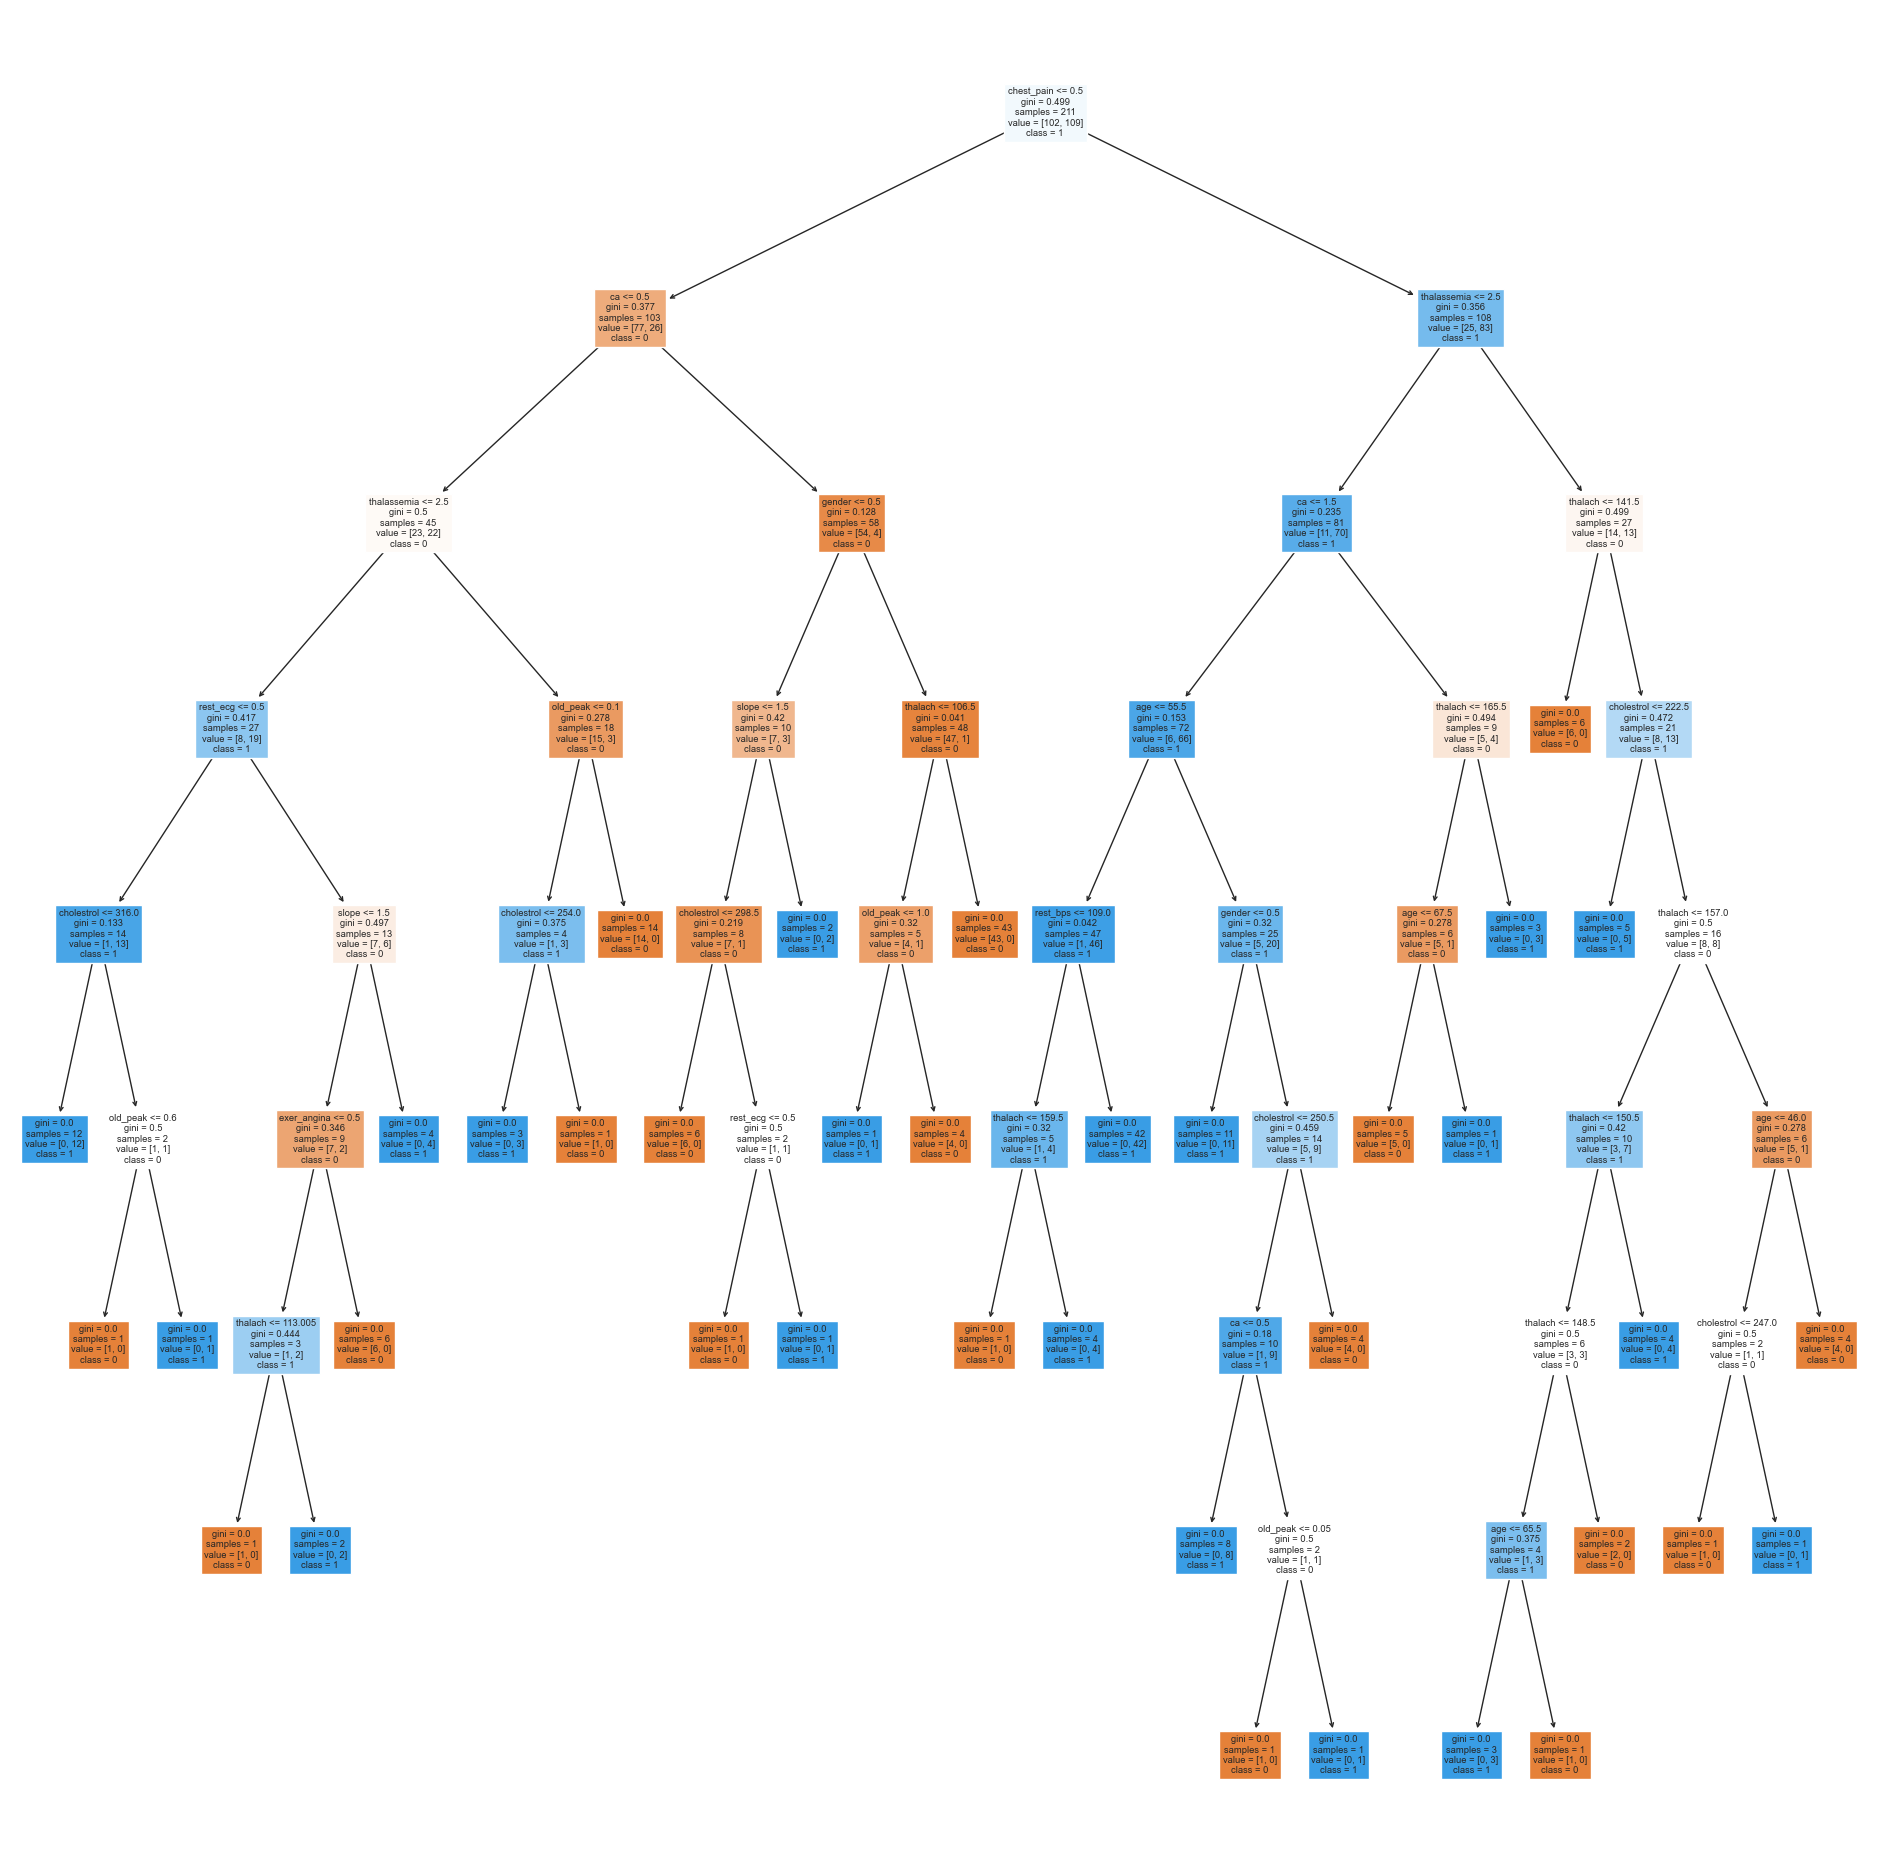

In [161]:
plt.figure (figsize =(24,24))
plot_tree(dt1 , feature_names=fn , class_names=cn,filled=True)
plt.show()

## DT2



In [170]:
dt2 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 6 , min_samples_split = 10 ,random_state = 25)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10,
                       random_state=25)

              precision    recall  f1-score   support

           0       0.71      0.81      0.75        36
           1       0.86      0.78      0.82        55

    accuracy                           0.79        91
   macro avg       0.78      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



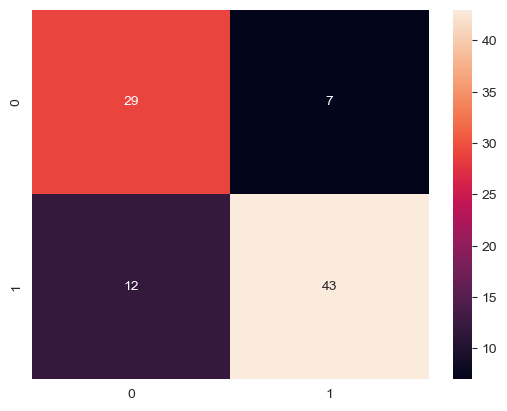

,Train_Acc,Test_Acc,Precision,Recall
"DT1(entropy , MD = 6 , MSS=15)",0.924171,0.791209,0.86,0.781818


In [172]:
ypred_dt2=dt2.predict(x_test)
dt2_df = tmp(x_train , x_test , y_train,y_test,ypred_dt2 , dt2 , 'DT1(entropy , MD = 6 , MSS=15)')
dt2_df

In [173]:
##HOW to decide the best parameters - hyperparameter tuning

In [174]:
#### 1) GRIDSEARCHV (cv - cross vadilation )

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
hparams_dt = {'criterion' : ['gini' , 'entropy'], 'max_depth' : [4,5,6,7,8],'min_samples_split' :[8,10,12,15]}
    

In [206]:
dt = DecisionTreeClassifier()
gs1 = GridSearchCV(estimator=dt , param_grid=hparams_dt,cv=5,scoring='accuracy')
gs1.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12, 15]},
             scoring='accuracy')

In [207]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=12)
0.7626799557032116


In [208]:
gs1_res = pd.DataFrame(gs1.cv_results_)
gs1_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005717,0.003028,0.000000,0.000000,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.813953,0.857143,0.714286,0.666667,0.642857,0.738981,0.083261,35
1,0.002546,0.003145,0.005661,0.006027,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.813953,0.857143,0.714286,0.714286,0.642857,0.748505,0.076927,19
2,0.001647,0.003294,0.004741,0.005920,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.813953,0.857143,0.714286,0.738095,0.642857,0.753267,0.075383,7
3,0.000000,0.000000,0.003129,0.006258,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.813953,0.857143,0.666667,0.714286,0.642857,0.738981,0.083261,34
4,0.007327,0.007023,0.002408,0.004815,gini,5,8,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.790698,0.833333,0.738095,0.714286,0.666667,0.748616,0.058229,15


In [209]:
gs1_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [210]:
gs1_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','mean_test_score','rank_test_score']].sort_values('mean_test_score', ascending= False).head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
26,entropy,5,12,0.762680,1
32,entropy,7,8,0.758140,2
21,entropy,4,10,0.758029,3
22,entropy,4,12,0.757918,4
9,gini,6,10,0.753488,5


In [211]:
#### DT MODEL BASED ON RESULTS OBTAINED FROM GRIDSEARCH cv 

In [212]:
dt3 =  DecisionTreeClassifier(**gs1.best_params_)
dt3.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=12)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        36
           1       0.86      0.80      0.83        55

    accuracy                           0.80        91
   macro avg       0.79      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



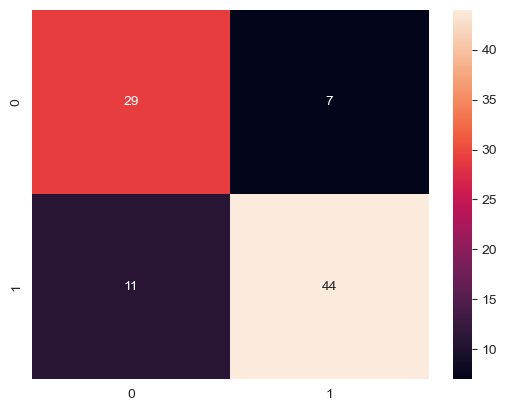

,Train_Acc,Test_Acc,Precision,Recall
"DT3(entropy , MD = 5 , MSS =8 )",0.914692,0.802198,0.862745,0.8


In [213]:
ypred_dt3 = dt3.predict(x_test)
dt3_df = tmp(x_train, x_test , y_train , y_test , ypred_dt3 , dt3 , 'DT3(entropy , MD = 5 , MSS =8 )')
dt3_df

In [214]:
combined_res = pd.concat ([dt1_df , dt2_df , dt3_df])
combined_res

,Train_Acc,Test_Acc,Precision,Recall
DT1(gini),1.000000,0.813187,0.865385,0.818182
"DT1(entropy , MD = 6 , MSS=15)",0.924171,0.791209,0.860000,0.781818
"DT3(entropy , MD = 5 , MSS =8 )",0.914692,0.802198,0.862745,0.800000


## RANDOMIZED SEARCH CV

In [215]:
from sklearn.model_selection import RandomizedSearchCV

In [216]:
dt = DecisionTreeClassifier()
rs1 = RandomizedSearchCV(estimator=dt , param_distributions=hparams_dt , scoring='accuracy',cv=5)
rs1.fit(x_train , y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12, 15]},
                   scoring='accuracy')

In [217]:
print(rs1.best_params_)
print(rs1.best_estimator_)
print(rs1.best_score_)

{'min_samples_split': 8, 'max_depth': 7, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=8)
0.758250276854928


In [219]:
rs1_res = pd.DataFrame(rs1.cv_results_)
print(rs1_res)
rs1_res.head()

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003952      0.003583         0.004062        0.005157   
1       0.004769      0.003174         0.002415        0.003221   
2       0.005761      0.007105         0.003514        0.004032   
3       0.006645      0.005332         0.001823        0.002489   
4       0.004582      0.002621         0.002249        0.002172   
5       0.005159      0.001289         0.001816        0.001091   
6       0.006692      0.002297         0.002535        0.002022   
7       0.005607      0.001350         0.002727        0.000465   
8       0.007236      0.001686         0.000000        0.000000   
9       0.004056      0.003640         0.003880        0.003955   

  param_min_samples_split param_max_depth param_criterion  \
0                      12               7         entropy   
1                       8               5            gini   
2                       8               7         entropy   
3                 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003952,0.003583,0.004062,0.005157,12,7,entropy,"{'min_samples_split': 12, 'max_depth': 7, 'cri...",0.813953,0.833333,0.714286,0.738095,0.595238,0.738981,0.084612,8
1,0.004769,0.003174,0.002415,0.003221,8,5,gini,"{'min_samples_split': 8, 'max_depth': 5, 'crit...",0.790698,0.833333,0.738095,0.666667,0.690476,0.743854,0.061711,5
2,0.005761,0.007105,0.003514,0.004032,8,7,entropy,"{'min_samples_split': 8, 'max_depth': 7, 'crit...",0.767442,0.904762,0.761905,0.690476,0.666667,0.758250,0.083120,1
3,0.006645,0.005332,0.001823,0.002489,15,6,gini,"{'min_samples_split': 15, 'max_depth': 6, 'cri...",0.813953,0.809524,0.666667,0.690476,0.642857,0.724695,0.072662,10
4,0.004582,0.002621,0.002249,0.002172,8,5,entropy,"{'min_samples_split': 8, 'max_depth': 5, 'crit...",0.813953,0.880952,0.666667,0.714286,0.642857,0.743743,0.090269,6


In [220]:
rs1_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','mean_test_score','rank_test_score']].sort_values('mean_test_score', ascending= False).head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
2,entropy,7,8,0.758250,1
6,entropy,4,12,0.753267,2
8,gini,7,10,0.748726,3
5,gini,6,10,0.743965,4
1,gini,5,8,0.743854,5


In [221]:
dt4 =  DecisionTreeClassifier(**gs1.best_params_)
dt4.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=12)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        36
           1       0.86      0.80      0.83        55

    accuracy                           0.80        91
   macro avg       0.79      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



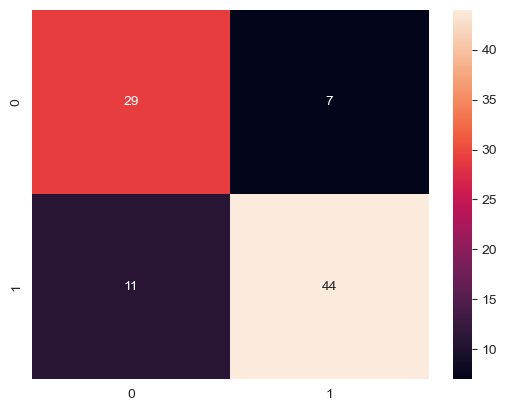

,Train_Acc,Test_Acc,Precision,Recall
"DT4(entropy , MD = 7 , MSS =8 )",0.914692,0.802198,0.862745,0.8


In [222]:
ypred_dt4 = dt4.predict(x_test)
dt4_df = tmp(x_train, x_test , y_train , y_test , ypred_dt4 , dt4 , 'DT4(entropy , MD = 7 , MSS =8 )')
dt4_df

In [223]:
combine_res = pd.concat([dt1_df , dt2_df , dt3_df , dt4_df])
combine_res

,Train_Acc,Test_Acc,Precision,Recall
DT1(gini),1.000000,0.813187,0.865385,0.818182
"DT1(entropy , MD = 6 , MSS=15)",0.924171,0.791209,0.860000,0.781818
"DT3(entropy , MD = 5 , MSS =8 )",0.914692,0.802198,0.862745,0.800000
"DT4(entropy , MD = 7 , MSS =8 )",0.914692,0.802198,0.862745,0.800000
